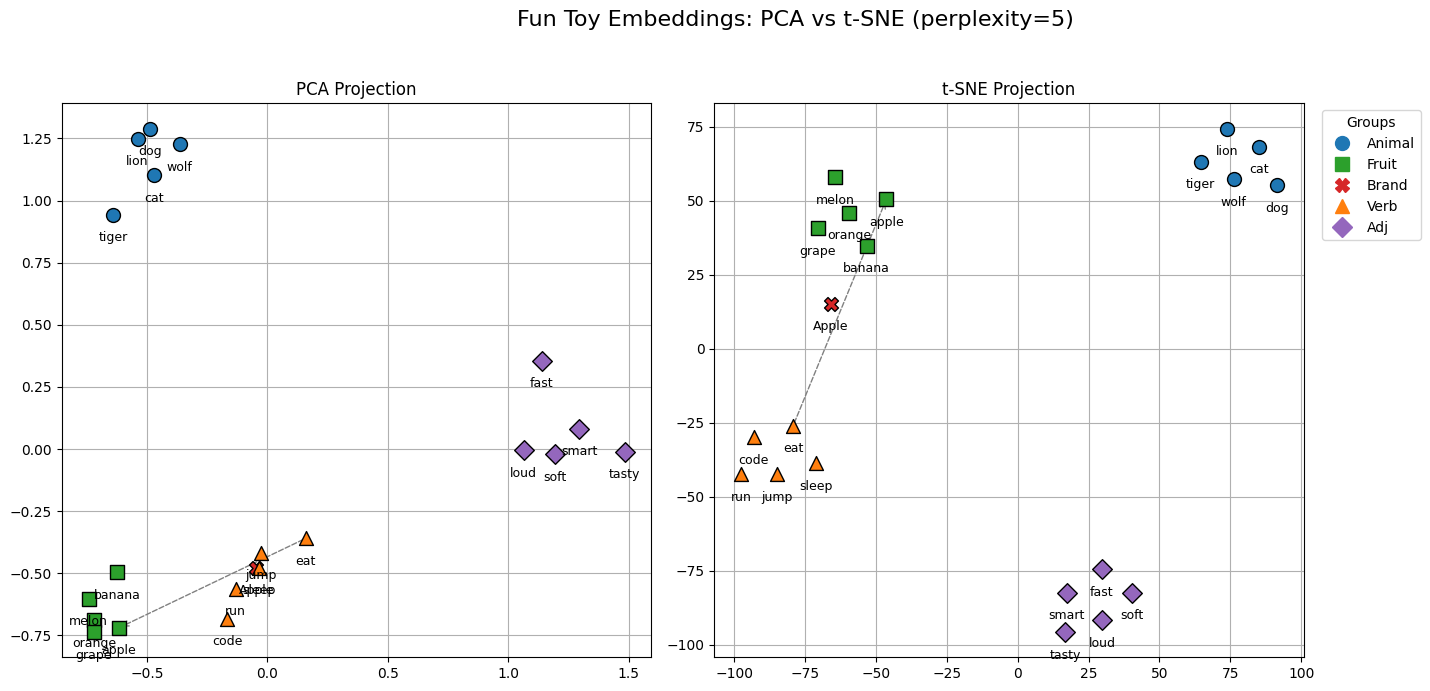

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1) Expanded toy vocabulary
words = [
    'dog', 'cat', 'lion', 'tiger', 'wolf',          # animals
    'apple', 'banana', 'orange', 'grape', 'melon',   # fruits
    'Apple',                                         # polysemous brand
    'run', 'eat', 'jump', 'sleep', 'code',           # verbs
    'fast', 'tasty', 'soft', 'loud', 'smart'         # adjectives
]
groups = ['animal']*5 + ['fruit']*5 + ['brand'] + ['verb']*5 + ['adj']*5

# 2) Color & marker per group
palette = {
    'animal':'tab:blue',
    'fruit':'tab:green',
    'brand':'tab:red',
    'verb':'tab:orange',
    'adj':'tab:purple'
}
markers = {
    'animal':'o',
    'fruit':'s',
    'brand':'X',
    'verb':'^',
    'adj':'D'
}

# 3) Prototype vectors in 12-D 
np.random.seed(1)
proto = {
    'animal': np.concatenate([np.ones(2),      np.zeros(10)]),
    'fruit':  np.concatenate([np.zeros(2),     np.ones(2),      np.zeros(8)]),
    'brand':  np.concatenate([np.zeros(4),     np.ones(2),      np.zeros(6)]),
    'verb':   np.concatenate([np.zeros(6),     np.ones(2),      np.zeros(4)]),
    'adj':    np.concatenate([np.zeros(8),     np.ones(2),      np.zeros(2)])
}

# 4) Build embeddings: prototype + noise
embeddings = np.vstack([
    proto[grp] + 0.15 * np.random.randn(12)
    for grp in groups
])

# 5) Dimensionality Reduction
pca_proj = PCA(n_components=2).fit_transform(embeddings)
tsne_proj = TSNE(
    n_components=2, 
    perplexity=5,        # < n_samples
    random_state=42, 
    init='pca'
).fit_transform(embeddings)

# 6) Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16,7))

for ax, proj, title in zip(axes, [pca_proj, tsne_proj], ['PCA', 't-SNE']):
    for i, word in enumerate(words):
        grp = groups[i]
        x, y = proj[i]
        ax.scatter(x, y,
                   color=palette[grp],
                   marker=markers[grp],
                   s=100, edgecolor='k', zorder=3)
        # annotate with offset in points: (0, -12) below the point
        ax.annotate(
            word,
            xy=(x, y),
            xytext=(0, -12),
            textcoords='offset points',
            ha='center',
            va='top',
            fontsize=9,
            zorder=4
        )
    # arrow from 'eat' -> 'apple'
    start = proj[words.index('eat')]
    end   = proj[words.index('apple')]
    ax.annotate(
        '', 
        xy=end, xytext=start,
        arrowprops=dict(arrowstyle='->', linestyle='--', color='gray'),
        zorder=2
    )
    ax.set_title(f"{title} Projection")
    ax.grid(True)

# 7) Legend on the right plot
handles = [
    plt.Line2D([], [], color=palette[grp], marker=markers[grp],
               linestyle='None', markersize=10, label=grp.capitalize())
    for grp in palette
]
axes[1].legend(handles=handles, title="Groups",
               bbox_to_anchor=(1.02, 1), loc='upper left')

plt.suptitle("Fun Toy Embeddings: PCA vs t-SNE (perplexity=5)", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


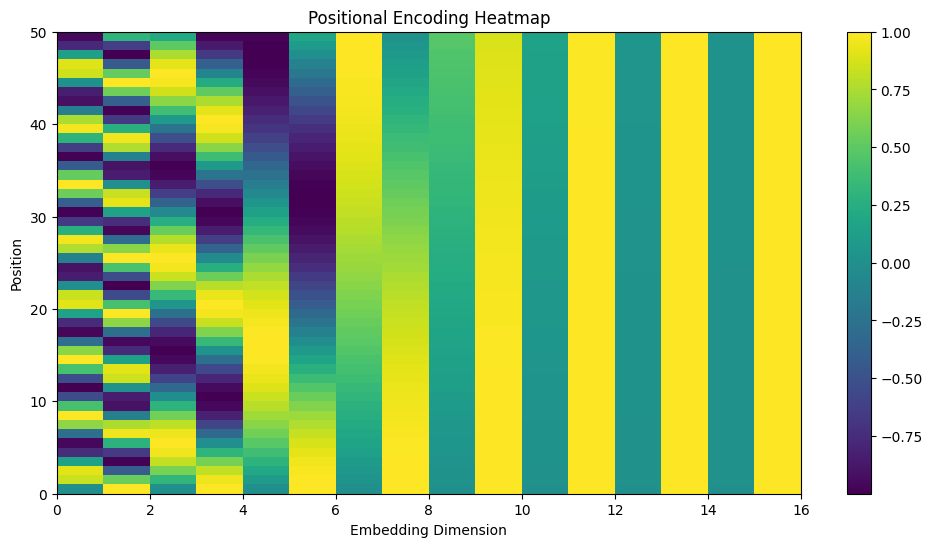

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / d_model)
    angle_rads = pos * angle_rates
    # apply sin to even indices; cos to odd indices
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return angle_rads

pos_encoding = positional_encoding(50, 16)

plt.figure(figsize=(12, 6))
plt.pcolormesh(pos_encoding, cmap='viridis')
plt.xlabel('Embedding Dimension')
plt.ylabel('Position')
plt.title("Positional Encoding Heatmap")
plt.colorbar()
plt.show()


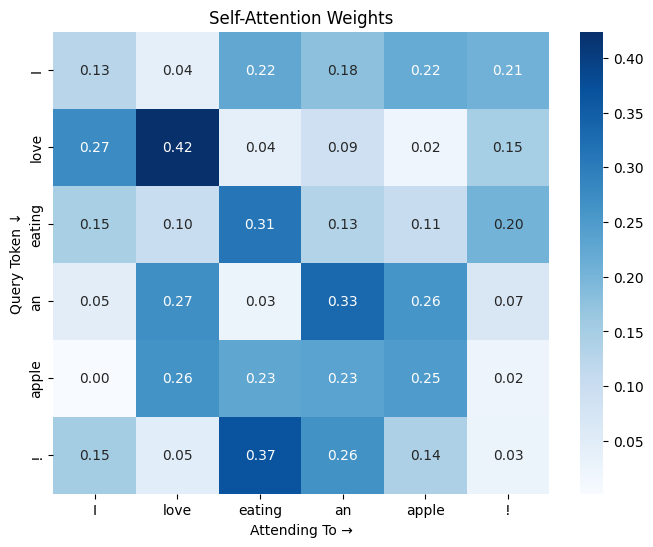

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Fake attention scores for 6 tokens
tokens = ['I', 'love', 'eating', 'an', 'apple', '!']
attention = np.random.rand(6, 6)
attention = attention / attention.sum(axis=1, keepdims=True)  # Normalize rows

plt.figure(figsize=(8, 6))
sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap='Blues', annot=True, fmt=".2f")
plt.title("Self-Attention Weights")
plt.xlabel("Attending To →")
plt.ylabel("Query Token ↓")
plt.show()


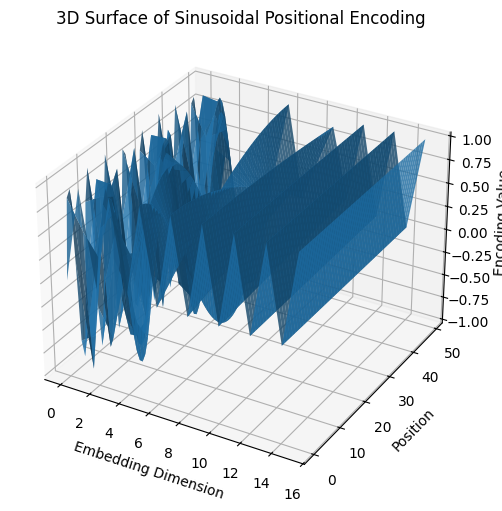

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def pos_enc(seq_len, d_model):
    pos = np.arange(seq_len)[:,None]
    i = np.arange(d_model)[None,:]
    rates = 1/np.power(10000, (2*(i//2))/d_model)
    angles = pos * rates
    angles[:,0::2] = np.sin(angles[:,0::2])
    angles[:,1::2] = np.cos(angles[:,1::2])
    return angles

# Generate the positional encodings
PE = pos_enc(50, 16)  # shape = (50 positions, 16 dims)

# Create the meshgrid
X, Y = np.meshgrid(np.arange(PE.shape[1]), np.arange(PE.shape[0]))

# Plot the full surface
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, PE, rstride=1, cstride=1, alpha=0.8)
ax.set_xlabel("Embedding Dimension")
ax.set_ylabel("Position")
ax.set_zlabel("Encoding Value")
plt.title("3D Surface of Sinusoidal Positional Encoding")
plt.show()
